## Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## K_Net_Tc_Pd Record

In [ ]:
import pandas as pd

file_paths = ['/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1996.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1997.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1998.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1999.csv'
              ]

filenames = []
record_counts = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    filenames.append(file_path.split('/')[-1])
    record_counts.append(len(df))
record_info_df = pd.DataFrame({'Filename': filenames, 'Record Count': record_counts})
print(record_info_df)

                                 Filename  Record Count
0  KNet_Tc_Pd_ManuallyPlusKalkan_1996.csv          3790
1  KNet_Tc_Pd_ManuallyPlusKalkan_1997.csv          7732
2  KNet_Tc_Pd_ManuallyPlusKalkan_1998.csv          6474
3  KNet_Tc_Pd_ManuallyPlusKalkan_1999.csv          5224


## UD file Records

In [ ]:
import os

root_dir = "/content/drive/MyDrive/Earthquake_K_Net"

year_file_count = {}

for year_folder in os.listdir(root_dir):
    year_folder_path = os.path.join(root_dir, year_folder)
    if os.path.isdir(year_folder_path):
        year_count = 0
        for knt_folder in os.listdir(year_folder_path):
            knt_folder_path = os.path.join(year_folder_path, knt_folder)
            if os.path.isdir(knt_folder_path):
                # Count .UD files in each .knt folder
                ud_files = [f for f in os.listdir(knt_folder_path) if f.endswith('.UD')]
                year_count += len(ud_files)
        year_file_count[year_folder] = year_count        # Store the count for this year


year_file_count_df = pd.DataFrame.from_dict(year_file_count, orient='index', columns=['Number of .UD Files'])

print(year_file_count_df)


      Number of .UD Files
1996                 2345
1997                 4988
1998                 4204
1999                 3279
2000                 3594


##CSV File record > .UD File Record

In [ ]:
final_table = pd.merge(record_info_df, year_file_count_df, left_on='Year', right_index=True, how='outer')

# Fill NaN values with 0
final_table.fillna(0, inplace=True)

final_table = final_table[['Year', 'Record Count', 'Number of .UD Files']]

print(final_table)


KeyError: 'Year'

In [ ]:
import pandas as pd
import os

def preprocess_csv(file_path):
    df = pd.read_csv(file_path)
    df = df[df['pick_index_manually'] >= 100]
    processed_folder = "/content/drive/MyDrive/processed_data"
    os.makedirs(processed_folder, exist_ok=True)  # Create the folder if it doesn't exist
    processed_file_path = os.path.join(processed_folder, os.path.basename(file_path))
    df.to_csv(processed_file_path, index=False)
    print(f"Processed file saved at: {processed_file_path}")

file_paths = ['/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1996.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1997.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1998.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_1999.csv']

for file_path in file_paths:
    preprocess_csv(file_path)

Processed file saved at: /content/drive/MyDrive/processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1996.csv
Processed file saved at: /content/drive/MyDrive/processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1997.csv
Processed file saved at: /content/drive/MyDrive/processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1998.csv
Processed file saved at: /content/drive/MyDrive/processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1999.csv


In [ ]:
import pandas as pd
import os
def preprocess_and_count_records(file_path):
    df = pd.read_csv(file_path)
    total_records = len(df)
    processed_df = df[df['pick_index_manually'] >= 100]
    processed_records = len(processed_df)

    return total_records, processed_records

records_info = []
for file_path in file_paths:
    year = file_path.split('_')[-1].split('.')[0]  # Extract year from file path
    total_records, processed_records = preprocess_and_count_records(file_path)
    records_info.append({'Year': year, 'Total Records': total_records, 'Processed Records': processed_records})
records_info_df = pd.DataFrame(records_info)
print(records_info_df)


   Year  Total Records  Processed Records
0  1996           3790               2217
1  1997           7732               4668
2  1998           6474               3970
3  1999           5224               3086


In [ ]:
merged_table = pd.merge(records_info_df, year_file_count_df, left_on='Year', right_index=True, how='left')
merged_table['Number of .UD Files'].fillna(0, inplace=True)
merged_table = merged_table[['Year', 'Total Records', 'Number of .UD Files', 'Processed Records']]
print(merged_table)


   Year  Total Records  Number of .UD Files  Processed Records
0  1996           3790                 2345               2217
1  1997           7732                 4988               4668
2  1998           6474                 4204               3970
3  1999           5224                 3279               3086


In [2]:
import os
import pandas as pd

root_dir = "/content/drive/MyDrive/Earthquake_K_Net"

for year_folder in os.listdir(root_dir):
    year_folder_path = os.path.join(root_dir, year_folder)
    if os.path.isdir(year_folder_path):
        ud_files = []  # List to store names of .UD files
        for knt_folder in os.listdir(year_folder_path):
            knt_folder_path = os.path.join(year_folder_path, knt_folder)
            if os.path.isdir(knt_folder_path):
                ud_files.extend([f for f in os.listdir(knt_folder_path) if f.endswith('.UD')])
        ud_files_df = pd.DataFrame(ud_files, columns=['UD File Name'])
        csv_file_path = os.path.join(root_dir, f'{year_folder}_UD_files.csv')
        ud_files_df.to_csv(csv_file_path, index=False)
        print(f"CSV file saved for {year_folder}: {csv_file_path}")

CSV file saved for 1996: /content/drive/MyDrive/Earthquake_K_Net/1996_UD_files.csv
CSV file saved for 1997: /content/drive/MyDrive/Earthquake_K_Net/1997_UD_files.csv
CSV file saved for 1998: /content/drive/MyDrive/Earthquake_K_Net/1998_UD_files.csv
CSV file saved for 1999: /content/drive/MyDrive/Earthquake_K_Net/1999_UD_files.csv
CSV file saved for 2000: /content/drive/MyDrive/Earthquake_K_Net/2000_UD_files.csv
CSV file saved for matched_data: /content/drive/MyDrive/Earthquake_K_Net/matched_data_UD_files.csv
CSV file saved for .ipynb_checkpoints: /content/drive/MyDrive/Earthquake_K_Net/.ipynb_checkpoints_UD_files.csv
CSV file saved for 2001: /content/drive/MyDrive/Earthquake_K_Net/2001_UD_files.csv
CSV file saved for 2002: /content/drive/MyDrive/Earthquake_K_Net/2002_UD_files.csv
CSV file saved for 2003: /content/drive/MyDrive/Earthquake_K_Net/2003_UD_files.csv


In [3]:
import pandas as pd
import os

# Paths
root_files = ['/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_2000.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_2001.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/KNet_Tc_Pd_ManuallyPlusKalkan_2002.csv',
              ]

ud_files_csvs = ['/content/drive/MyDrive/Earthquake_K_Net/2000_UD_files.csv',
                 '/content/drive/MyDrive/Earthquake_K_Net/2001_UD_files.csv',
                 '/content/drive/MyDrive/Earthquake_K_Net/2002_UD_files.csv',
                 ]

matched_data_folder = "/content/drive/MyDrive/Earthquake_K_Net/matched_data"
os.makedirs(matched_data_folder, exist_ok=True)  # Create the folder if it doesn't exist

def retrieve_matching_records(root_file, ud_files_csv):
    root_df = pd.read_csv(root_file)
    ud_df = pd.read_csv(ud_files_csv)
    matched_records_df = root_df[root_df['records name'].isin(ud_df['UD File Name'])]
    return matched_records_df
for root_file, ud_files_csv in zip(root_files, ud_files_csvs):
    matched_records_df = retrieve_matching_records(root_file, ud_files_csv)
    matched_data_file = os.path.join(matched_data_folder, os.path.basename(root_file).replace(".csv", "_matched.csv"))
    matched_records_df.to_csv(matched_data_file, index=False)
    print(f"Matched data saved for {os.path.basename(root_file)}: {matched_data_file}")

Matched data saved for KNet_Tc_Pd_ManuallyPlusKalkan_2000.csv: /content/drive/MyDrive/Earthquake_K_Net/matched_data/KNet_Tc_Pd_ManuallyPlusKalkan_2000_matched.csv
Matched data saved for KNet_Tc_Pd_ManuallyPlusKalkan_2001.csv: /content/drive/MyDrive/Earthquake_K_Net/matched_data/KNet_Tc_Pd_ManuallyPlusKalkan_2001_matched.csv
Matched data saved for KNet_Tc_Pd_ManuallyPlusKalkan_2002.csv: /content/drive/MyDrive/Earthquake_K_Net/matched_data/KNet_Tc_Pd_ManuallyPlusKalkan_2002_matched.csv


In [ ]:
import os
import pandas as pd
matched_data_folder = "/content/drive/MyDrive/Earthquake_K_Net/matched_data"
matched_record_counts = {}
for filename in os.listdir(matched_data_folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(matched_data_folder, filename))
        record_count = len(df)
        matched_record_counts[filename] = record_count
matched_record_counts_df = pd.DataFrame.from_dict(matched_record_counts, orient="index", columns=["Record Count"])
print(matched_record_counts_df)


                                                Record Count
KNet_Tc_Pd_ManuallyPlusKalkan_1996_matched.csv          2345
KNet_Tc_Pd_ManuallyPlusKalkan_1997_matched.csv          4909
KNet_Tc_Pd_ManuallyPlusKalkan_1998_matched.csv          4196
KNet_Tc_Pd_ManuallyPlusKalkan_1999_matched.csv          3276


In [ ]:
merged_table = pd.merge(merged_table, matched_record_counts_df, left_on='Year', right_index=True, how='left')
merged_table['Record Count'].fillna(0, inplace=True)
print(merged_table)

   Year  Total Records  Number of .UD Files  Processed Records  \
0  1996           3790                 2345               2217   
1  1997           7732                 4988               4668   
2  1998           6474                 4204               3970   
3  1999           5224                 3279               3086   

   Matched Record Count  Record Count  
0                     0           0.0  
1                     0           0.0  
2                     0           0.0  
3                     0           0.0  


In [4]:
import pandas as pd
import os

def preprocess_csv(file_path):
    df = pd.read_csv(file_path)
    df = df[df['pick_index_manually'] >= 100]
    processed_folder = "/content/drive/MyDrive/Final_processed_data"
    os.makedirs(processed_folder, exist_ok=True)  # Create the folder if it doesn't exist
    processed_file_path = os.path.join(processed_folder, os.path.basename(file_path))
    df.to_csv(processed_file_path, index=False)
    print(f"Processed file saved at: {processed_file_path}")

matched_paths = ['/content/drive/MyDrive/Earthquake_K_Net/matched_data/KNet_Tc_Pd_ManuallyPlusKalkan_2000_matched.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/matched_data/KNet_Tc_Pd_ManuallyPlusKalkan_2001_matched.csv',
              '/content/drive/MyDrive/Earthquake_K_Net/matched_data/KNet_Tc_Pd_ManuallyPlusKalkan_2002_matched.csv',
              ]

for file_path in matched_paths:
    preprocess_csv(file_path)

Processed file saved at: /content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_2000_matched.csv
Processed file saved at: /content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_2001_matched.csv
Processed file saved at: /content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_2002_matched.csv


# Single DataFrame
### Train & Test dataset

In [5]:
import pandas as pd

# List of file paths for year-wise CSV files
file_paths = [
    "/content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1996_matched.csv",
    "/content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1997_matched.csv",
    "/content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1998_matched.csv",
    "/content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_1999_matched.csv",
    "/content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_2000_matched.csv",
    "/content/drive/MyDrive/Final_processed_data/KNet_Tc_Pd_ManuallyPlusKalkan_2002_matched.csv",

]

dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

train_df = combined_df.sample(frac=0.8, random_state=42)  # 80% for training
test_df = combined_df.drop(train_df.index)  # Remaining 20% for testing

# Print shapes of training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (18402, 44)
Testing set shape: (4601, 44)


In [8]:
print("Column Names:")                           # Display column names
print(train_df.columns)

print("\nSummary Statistics:")                   # Display summary statistics of numerical features

print(train_df.describe())

print("\nInformation:")                          # Display information about non-null values and data types of features
print(train_df.info())


Column Names:
Index(['earthquake name', 'records name', 'earthquake date', 'earthquake time',
       'lat', 'long', 'depth', 'mag', 'stn_code', 'stn_lat', 'stn_long',
       'stn_height', 'rcd_date', 'rcd_time', 'frequency', 'rcd_duration',
       'direction', 'scale_factor', 'max_pga', 'epi_dist',
       'pick_index_manually', 'pick_index_kalkan', 'snr_db_kalkan', 'tc_5sec',
       'tc_4sec', 'tc_3sec', 'tc_2sec', 'tc_1sec', 'Pd_5sec', 'Pd_4sec',
       'Pd_3sec', 'Pd_2sec', 'Pd_1sec', 'Pga_5sec', 'Pga_4sec', 'Pga_3sec',
       'Pga_2sec', 'Pga_1sec', 'Channel', 'Scale_factor', 'PGA_ew',
       'Channel.1', 'Scale_factor.1', 'PGA_ns'],
      dtype='object')

Summary Statistics:
                lat          long         depth           mag       stn_lat  \
count  18402.000000  18402.000000  18402.000000  18402.000000  18402.000000   
mean      36.090157    138.137137     41.527823      4.424525     36.170865   
std        2.947174      4.066242     45.580096      0.732618      2.938474

### Visualizing Records on Train & Test

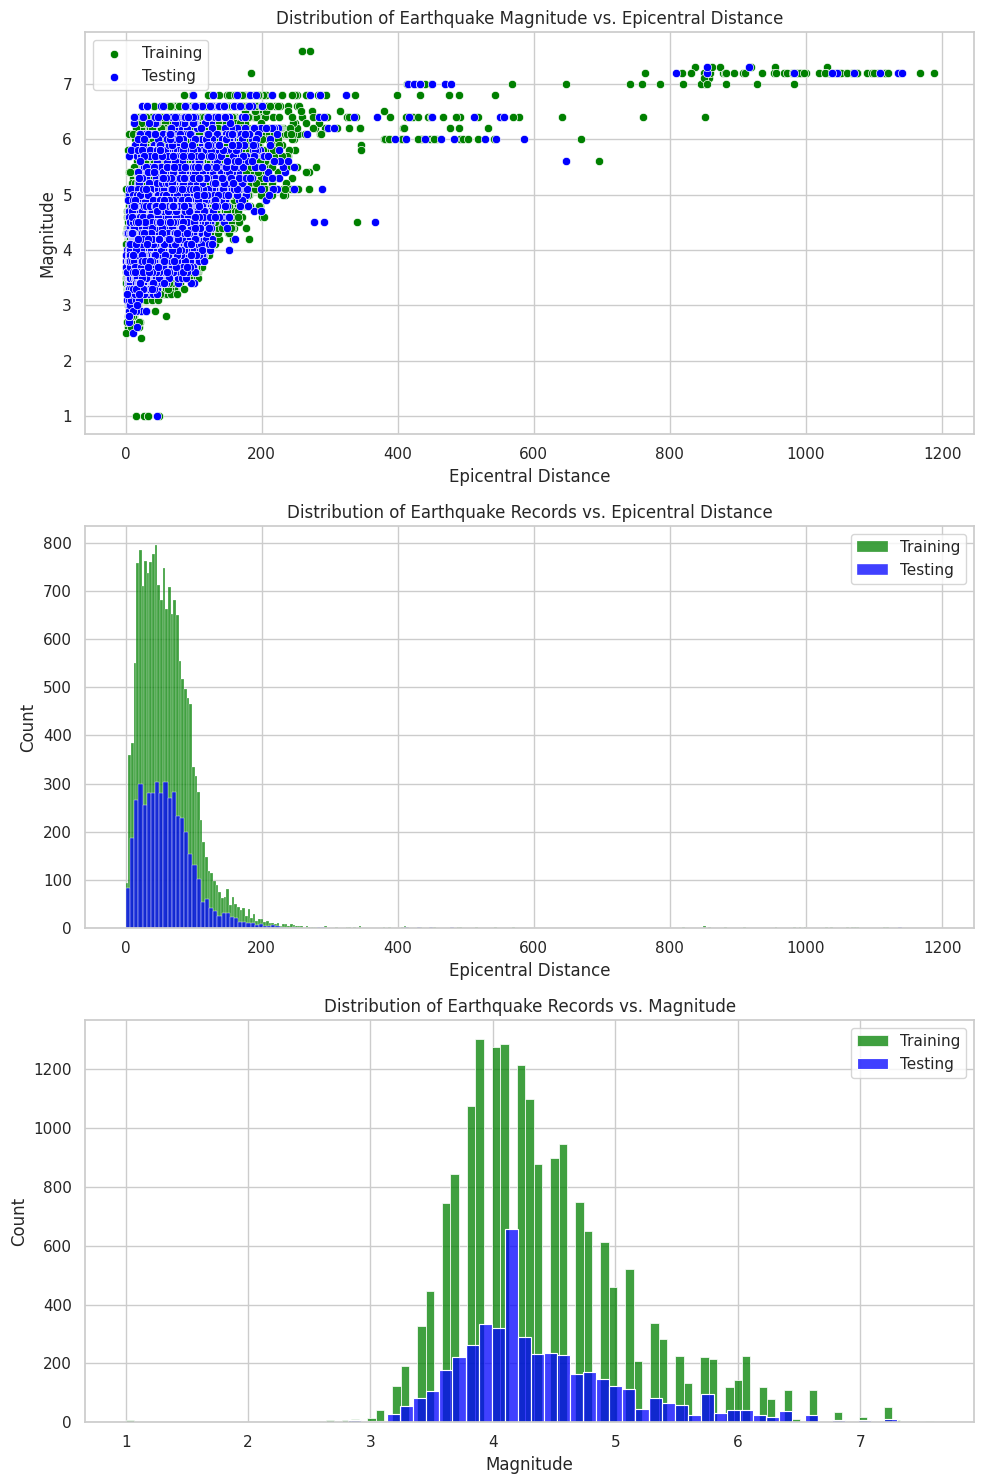

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot (a) Mag vs Epicentral Distance
sns.scatterplot(data=train_df, x='epi_dist', y='mag', color='green', label='Training', ax=axes[0])
sns.scatterplot(data=test_df, x='epi_dist', y='mag', color='blue', label='Testing', ax=axes[0])
axes[0].set_title("Distribution of Earthquake Magnitude vs. Epicentral Distance")
axes[0].set_xlabel("Epicentral Distance")
axes[0].set_ylabel("Magnitude")
axes[0].legend()

# Plot (b) Epicentral Distance vs Records
sns.histplot(train_df['epi_dist'], color='green', label='Training', ax=axes[1])
sns.histplot(test_df['epi_dist'], color='blue', label='Testing', ax=axes[1])
axes[1].set_title("Distribution of Earthquake Records vs. Epicentral Distance")
axes[1].set_xlabel("Epicentral Distance")
axes[1].set_ylabel("Count")
axes[1].legend()

# Plot (c) Magnitude vs Records
sns.histplot(train_df['mag'], color='green', label='Training', ax=axes[2])
sns.histplot(test_df['mag'], color='blue', label='Testing', ax=axes[2])
axes[2].set_title("Distribution of Earthquake Records vs. Magnitude")
axes[2].set_xlabel("Magnitude")
axes[2].set_ylabel("Count")
axes[2].legend()

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

#data = pd.read_csv("your_data.csv")  # Replace "your_data.csv" with the path to your CSV file

numerical_features = combined_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix_pearson = numerical_features.corr(method='pearson')

correlation_matrix_spearman = numerical_features.corr(method='spearman')

# Print correlation matrix for Pearson method
print("Correlation Matrix (Pearson):")
print(correlation_matrix_pearson)

# Print correlation matrix for Spearman method
print("\nCorrelation Matrix (Spearman):")
print(correlation_matrix_spearman)


Correlation Matrix (Pearson):
                          lat      long     depth       mag   stn_lat  \
lat                  1.000000  0.802209  0.314295  0.160183  0.980680   
long                 0.802209  1.000000  0.235610  0.154815  0.817514   
depth                0.314295  0.235610  1.000000  0.345404  0.286125   
mag                  0.160183  0.154815  0.345404  1.000000  0.164801   
stn_lat              0.980680  0.817514  0.286125  0.164801  1.000000   
stn_long             0.816853  0.977693  0.316963  0.147208  0.831019   
stn_height           0.005019 -0.038634 -0.041455 -0.025569  0.009677   
rcd_duration         0.109425  0.108689  0.060990  0.041559  0.101544   
scale_factor         0.046653 -0.021652  0.037197 -0.020322  0.033543   
max_pga              0.011475  0.027306 -0.025643  0.200731  0.008197   
epi_dist             0.219827  0.082629  0.719872  0.539163  0.191042   
pick_index_manually -0.063493 -0.067463 -0.062248  0.099726 -0.063007   
pick_index_kalkan   -

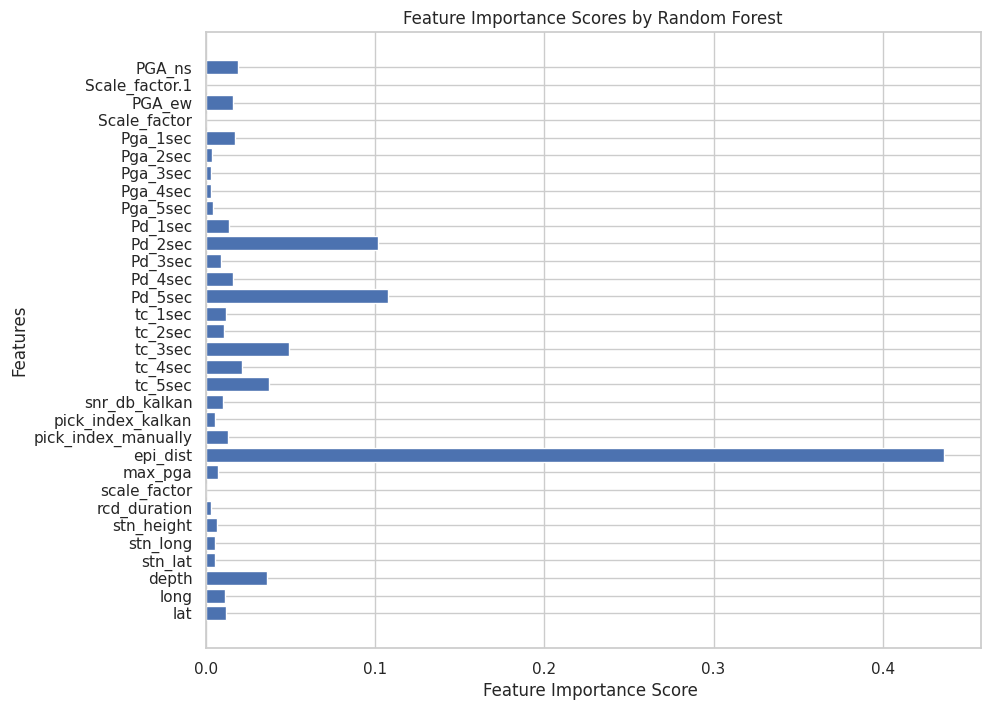

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

numerical_features = combined_df.select_dtypes(include=['float64', 'int64'])
X = numerical_features.drop(columns=['mag'])  # Features
y = numerical_features['mag']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 8))
sorted_indices = feature_importances.argsort()[::-1]
feature_names = X.columns
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance Score ')
plt.ylabel('Features')
plt.title('Feature Importance Scores by Random Forest')
plt.show()

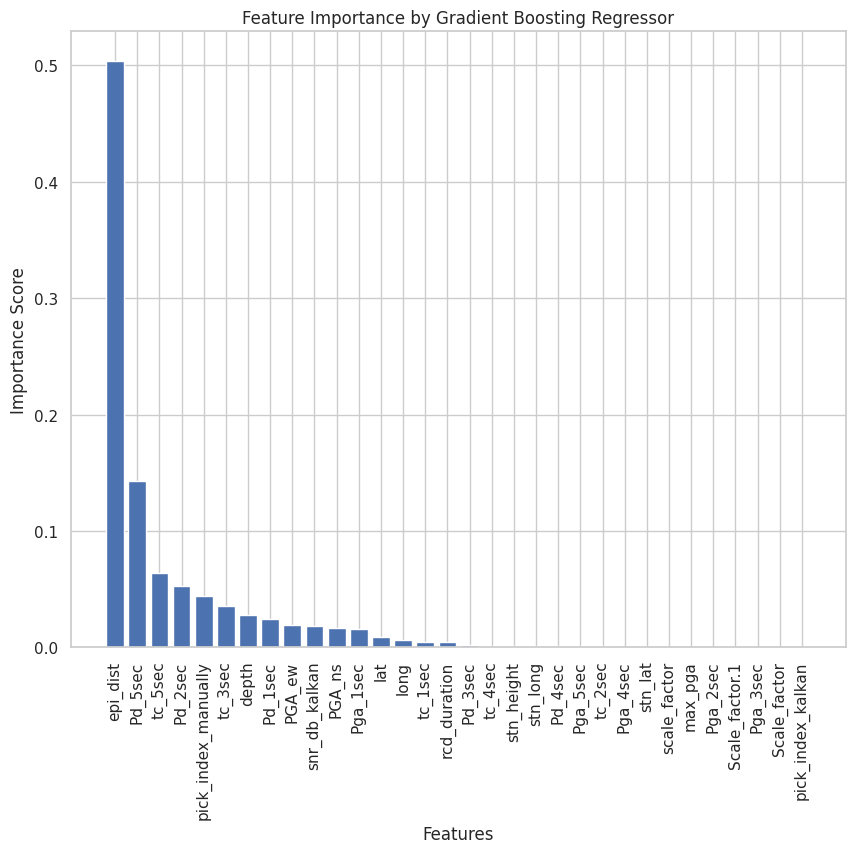

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

numerical_features = combined_df.select_dtypes(include=['float64', 'int64'])
X = numerical_features.drop(columns=['mag'])  # Features
y = numerical_features['mag']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X, y)

feature_importances = gb_regressor.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_names = X.columns
plt.figure(figsize=(10, 8))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance by Gradient Boosting Regressor')
plt.show()
